OBJ:
* Demo smooth pipeline for complete ML model.

In [1]:
import pandas as pd
import numpy as np

## Load data

In [2]:
from src.data.io import import_and_prep_target_df_from_pickle, import_and_merge_feature_dfs_from_pickles

In [3]:
df = import_and_prep_target_df_from_pickle('./../../../data/interim/D3_dailyTS/EDdaily_occupancy_classRollQ90_clipped.pkl')

df.head()

,flag_target,EDMeanOcc_prevday
dt_date,,
2011-09-01,0,NaN
2011-09-02,0,28.000000
2011-09-03,0,36.833333
2011-09-04,0,29.291667
2011-09-05,0,36.833333


In [4]:
df.shape

(2587, 2)

In [5]:
pickle_features_list = ['callender.pkl', 'EDmorn.pkl']
df2 = import_and_merge_feature_dfs_from_pickles('./../../../data/interim/D3_dailyTS/', pickle_features_list, df)
df2.head()

,flag_target,EDMeanOcc_prevday,year,month,holiday,christmas_period,Friday,Monday,Saturday,Sunday,...,Tuesday,Wednesday,EDMORNoccupancy,EDMORNage_mean,EDMORNocc_age_75plus,EDMORNocc_ambulance,EDMORNocc_majors,EDMORNocc_minors,EDMORNocc_resus,EDMORNocc_mmrother
dt_date,,,,,,,,,,,,,,,,,,,,,
2011-09-01,0,NaN,2011,9,0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,13,47.1538,3,7,8,2,3,0
2011-09-02,0,28.000000,2011,9,0,0,1.0,0.0,0.0,0.0,...,0.0,0.0,7,47,1,7,6,0,1,0
2011-09-03,0,36.833333,2011,9,0,0,0.0,0.0,1.0,0.0,...,0.0,0.0,20,51.6,4,16,11,5,4,0
2011-09-04,0,29.291667,2011,9,0,0,0.0,0.0,0.0,1.0,...,0.0,0.0,23,40.5652,2,16,12,9,2,0
2011-09-05,0,36.833333,2011,9,0,0,0.0,1.0,0.0,0.0,...,0.0,0.0,9,49,1,8,7,0,1,1


In [6]:
for i in df2:
    print(i)

flag_target
EDMeanOcc_prevday
year
month
holiday
christmas_period
Friday
Monday
Saturday
Sunday
Thursday
Tuesday
Wednesday
EDMORNoccupancy
EDMORNage_mean
EDMORNocc_age_75plus
EDMORNocc_ambulance
EDMORNocc_majors
EDMORNocc_minors
EDMORNocc_resus
EDMORNocc_mmrother


### Create lagged and deriv vars 

In [7]:
def generate_rolling_features(df, col_name):
    "Makes new df with aditional rolling features from column given as str in col_name."
    df_new = df.copy()
    df_new[col_name + '_rollmean30'] = df_new[col_name].rolling(30).mean()
    df_new[col_name + '_rollmean14'] = df_new[col_name].rolling(14).mean()
    df_new[col_name + '_rollmean7'] = df_new[col_name].rolling(7).mean()
    df_new[col_name + '_rollmean3'] = df_new[col_name].rolling(3).mean()
    df_new[col_name + '_rollmean1'] = df_new[col_name].rolling(1).mean()
    return(df_new)

# df2 = generate_rolling_features(df2, 'EDMeanOcc_prevday')

In [8]:
def generate_deriv_features(df, col_name):
    "Mkaes new df with additional features which are derivities from column given as str in col_name.  "
    df_new = df.copy()
    df_new[col_name + '_deriv30'] = df_new[col_name].rolling(30).mean().diff(30)
    df_new[col_name + '_deriv14'] = df_new[col_name].rolling(14).mean().diff(14)
    df_new[col_name + '_deriv7'] = df_new[col_name].rolling(7).mean().diff(7)
    df_new[col_name + '_deriv3'] = df_new[col_name].rolling(3).mean().diff(3)
    df_new[col_name + '_deriv3'] = df_new[col_name].rolling(3).mean().diff(1)
    # adding these new derivitives seems not to make much differenece
#     df_new[col_name + '_deriv30'] = df_new[col_name].rolling(30).mean().diff(1) 
#     df_new[col_name + '_deriv14'] = df_new[col_name].rolling(14).mean().diff(1)
#     df_new[col_name + '_deriv7'] = df_new[col_name].rolling(7).mean().diff(1)
#     df_new[col_name + '_deriv3'] = df_new[col_name].rolling(3).mean().diff(1)
    return(df_new)

df2 = generate_deriv_features(df2, 'EDMeanOcc_prevday')

In [9]:
df2.head()

,flag_target,EDMeanOcc_prevday,year,month,holiday,christmas_period,Friday,Monday,Saturday,Sunday,...,EDMORNocc_age_75plus,EDMORNocc_ambulance,EDMORNocc_majors,EDMORNocc_minors,EDMORNocc_resus,EDMORNocc_mmrother,EDMeanOcc_prevday_deriv30,EDMeanOcc_prevday_deriv14,EDMeanOcc_prevday_deriv7,EDMeanOcc_prevday_deriv3
dt_date,,,,,,,,,,,,,,,,,,,,,
2011-09-01,0,NaN,2011,9,0,0,0.0,0.0,0.0,0.0,...,3,7,8,2,3,0,NaN,NaN,NaN,NaN
2011-09-02,0,28.000000,2011,9,0,0,1.0,0.0,0.0,0.0,...,1,7,6,0,1,0,NaN,NaN,NaN,NaN
2011-09-03,0,36.833333,2011,9,0,0,0.0,0.0,1.0,0.0,...,4,16,11,5,4,0,NaN,NaN,NaN,NaN
2011-09-04,0,29.291667,2011,9,0,0,0.0,0.0,0.0,1.0,...,2,16,12,9,2,0,NaN,NaN,NaN,NaN
2011-09-05,0,36.833333,2011,9,0,0,0.0,1.0,0.0,0.0,...,1,8,7,0,1,1,NaN,NaN,NaN,2.944444


## Split data

In [10]:
from src.data.preprocess import make_timeseries_test_train_splits
X_train, X_test, y_train, y_test = make_timeseries_test_train_splits(df2, 'flag_target', 365)

DATA POINTS:
orig size 2587
training:  2222
testing:  365


## Prepare data

In [11]:
# version 19.2
from sklearn.pipeline import Pipeline, FeatureUnion, make_pipeline

from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder 

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

from src.data.preprocess import DataFrameSelector, DataFrameReform, MakeBooleanAnInteger

In [12]:
X_train.head(2)

,EDMeanOcc_prevday,year,month,holiday,christmas_period,Friday,Monday,Saturday,Sunday,Thursday,...,EDMORNocc_age_75plus,EDMORNocc_ambulance,EDMORNocc_majors,EDMORNocc_minors,EDMORNocc_resus,EDMORNocc_mmrother,EDMeanOcc_prevday_deriv30,EDMeanOcc_prevday_deriv14,EDMeanOcc_prevday_deriv7,EDMeanOcc_prevday_deriv3
dt_date,,,,,,,,,,,,,,,,,,,,,
2011-09-01,NaN,2011,9,0,0,0.0,0.0,0.0,0.0,1.0,...,3,7,8,2,3,0,NaN,NaN,NaN,NaN
2011-09-02,28.0,2011,9,0,0,1.0,0.0,0.0,0.0,0.0,...,1,7,6,0,1,0,NaN,NaN,NaN,NaN


In [13]:

bin_features = ['holiday','christmas_period','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
num_features = list(set(X_train.columns) - set(bin_features))
all_features = num_features + bin_features

In [14]:
#### make numerical and binary pipelines
num_pipeline = Pipeline([
    ('selector',DataFrameSelector(num_features)),
#     ('feature_filter',SelectKBest(f_classif,k='all')),
    ('imputer',SimpleImputer(strategy='median')),
    ('std_scaler',StandardScaler()),
])

bin_pipeline = Pipeline([
    ('selector',DataFrameSelector(bin_features)),
    ('boolean_conversion',MakeBooleanAnInteger()),
    ('imputer',SimpleImputer(strategy='most_frequent')),
])


pipes_type_list = [
    ('num_pipeline',num_pipeline),
  ('bin_pipeline',bin_pipeline),
]


#### define all parts of preprocessing in pipeline
preprocess_pipeline = make_pipeline(
    FeatureUnion(transformer_list=pipes_type_list),
    DataFrameReform(all_features)
)

#### call pipeline
X_trainT = preprocess_pipeline.fit_transform(X_train,y_train)
X_trainT.head()

,month,EDMORNocc_ambulance,EDMORNocc_resus,EDMeanOcc_prevday_deriv30,EDMeanOcc_prevday_deriv14,EDMeanOcc_prevday,EDMeanOcc_prevday_deriv3,year,EDMORNocc_minors,EDMORNoccupancy,...,EDMORNocc_majors,holiday,christmas_period,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,0.711161,-2.253762,0.351324,0.031546,0.003313,-0.090345,0.010285,-1.789729,-1.007040,-1.831369,...,-2.062478,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.711161,-2.253762,-0.782506,0.031546,0.003313,-1.697900,0.010285,-1.789729,-1.705539,-2.595103,...,-2.420050,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.711161,-0.768289,0.918239,0.031546,0.003313,-0.382063,0.010285,-1.789729,0.040709,-0.940346,...,-1.526119,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.711161,-0.768289,-0.215591,0.031546,0.003313,-1.505490,0.010285,-1.789729,1.437707,-0.558479,...,-1.347333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.711161,-2.088709,-0.782506,0.031546,0.003313,-0.382063,1.026545,-1.789729,-1.705539,-2.340525,...,-2.241264,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


## Model search

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_predict, TimeSeriesSplit

In [16]:
lgr_model = LogisticRegression(solver='liblinear',class_weight ='balanced')

In [17]:
param_grid = {
    'C':[0.01, 0.05, 0.1,0.2,0.3,0.5,0.7,1,3,10],
       'penalty':['l1','l2'],
    'class_weight':['balanced', None, {1: 10}, {1:3},{1:5}, {1: 20}],
       }

In [18]:
tscv = TimeSeriesSplit(n_splits=6)

In [19]:
grid_search = GridSearchCV(lgr_model, param_grid, cv=tscv, scoring='average_precision', return_train_score=True)
# brier_score_loss, average_precision
grid_search.fit(X_trainT, y_train)

GridSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=6),
             error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight='balanced',
                                          dual=False, fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.01, 0.05, 0.1, 0.2, 0.3, 0.5, 0.7, 1, 3, 10],
                         'class_weight': ['balanced', None, {1: 10}, {1: 3},
                                          {1: 5}, {1: 20}],
                         'penalty': ['l1', 'l2']},
     

In [20]:
grid_search.best_params_

{'C': 0.3, 'class_weight': {1: 3}, 'penalty': 'l1'}

In [21]:
X_train.shape

(2222, 24)

## Evaluation using CV on training set

In [22]:
from src.eval.eval_utils import cross_val_predict_tscv, ModelCVEvaluation

Changing gridsearch target to briers score generally gives a cleaner PR curve.

No handles with labels found to put in legend.


INPUT DATA
FEATURES:24
TRAINING SAMPLES: 2222
CLASS 1 PROPORTION: 0.13
CV RESULTS
average_precision
TRAIN MEAN (std):  0.671 ( 0.037 )
VALID MEAN (std):  0.610 ( 0.094 )
DIFF BETWEEN MEAN:  0.061
briers_score_loss
TRAIN MEAN (std):  0.097 ( 0.009 )
VALID MEAN (std):  0.118 ( 0.067 )
DIFF BETWEEN MEAN:  -0.021


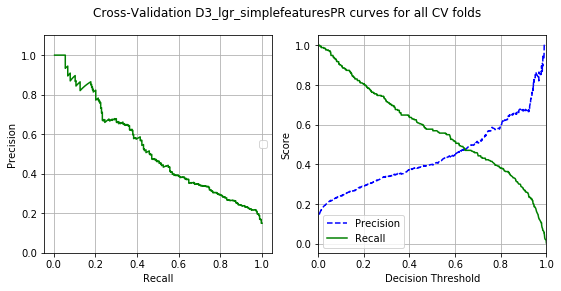

In [23]:
meval = ModelCVEvaluation(grid_search.best_estimator_, 'D3_lgr_simplefeatures', X_trainT, y_train, 6)

Save model evaluation to pickle.

In [24]:
import pickle
filename = '../../../data/output/SingleTSModelLGR_EDmornEDocc.pkl'

outfile = open(filename,'wb')
pickle.dump(meval,outfile)
outfile.close()

In [28]:
break

SyntaxError: 'break' outside loop (<ipython-input-28-6aaf1f276005>, line 4)

No handles with labels found to put in legend.


CV results
       average_precision  briers_score_loss
count           8.000000           8.000000
mean            0.638653           0.091830
std             0.080544           0.013339
min             0.543558           0.072972
25%             0.592713           0.085642
50%             0.613710           0.091301
75%             0.663501           0.098971
max             0.799489           0.112904


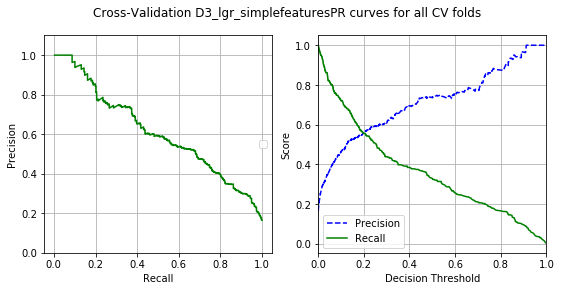

In [42]:
meval = ModelCVEvaluation(grid_search.best_estimator_, 'D3_lgr_simplefeatures', X_trainT, y_train, 8)

No handles with labels found to put in legend.


CV results
       average_precision  briers_score_loss
count           8.000000           8.000000
mean            0.637113           0.094094
std             0.081451           0.017514
min             0.540502           0.071554
25%             0.592122           0.085637
50%             0.608837           0.091331
75%             0.664692           0.100735
max             0.798621           0.124226


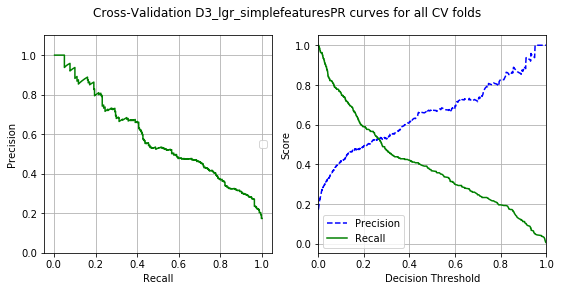

In [35]:
meval = ModelCVEvaluation(grid_search.best_estimator_, 'D3_lgr_simplefeatures', X_trainT, y_train, 8)

In [30]:
break 

SyntaxError: 'break' outside loop (<ipython-input-30-a17de20832ec>, line 4)

Model with only derivitive features (and not rolling ones):


(preciison has not increased much (although variability down), brier score has reduced however and std down).

No handles with labels found to put in legend.


CV results
       average_precision  briers_score_loss
count           8.000000           8.000000
mean            0.632332           0.094718
std             0.072367           0.017851
min             0.553703           0.075599
25%             0.585463           0.082168
50%             0.607766           0.088470
75%             0.662487           0.107249
max             0.773639           0.122626


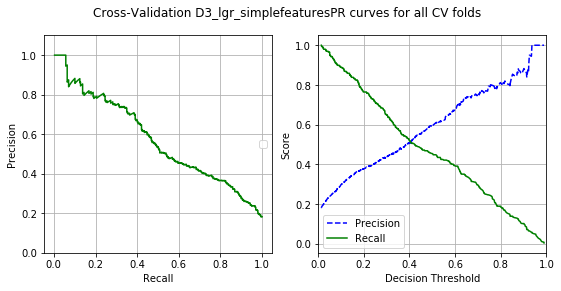

In [26]:
meval = ModelCVEvaluation(grid_search.best_estimator_, 'D3_lgr_simplefeatures', X_trainT, y_train, 8)

In [27]:
break

SyntaxError: 'break' outside loop (<ipython-input-27-6aaf1f276005>, line 4)

No handles with labels found to put in legend.


CV results
       average_precision  briers_score_loss
count           8.000000           8.000000
mean            0.629163           0.096135
std             0.071485           0.021082
min             0.545854           0.075452
25%             0.587376           0.081365
50%             0.609468           0.089206
75%             0.655875           0.106348
max             0.766701           0.134977


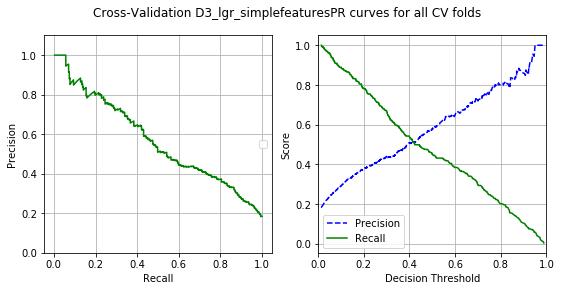

In [31]:
meval = ModelCVEvaluation(grid_search.best_estimator_, 'D3_lgr_simplefeatures', X_trainT, y_train, 8)

No handles with labels found to put in legend.


CV results
       average_precision  briers_score_loss
count           8.000000           8.000000
mean            0.632403           0.097319
std             0.078715           0.025675
min             0.548131           0.075397
25%             0.581992           0.084476
50%             0.619000           0.088712
75%             0.662368           0.099735
max             0.779247           0.155763


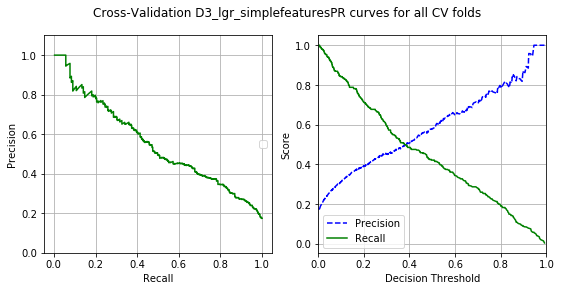

In [25]:
meval = ModelCVEvaluation(grid_search.best_estimator_, 'D3_lgr_simplefeatures', X_trainT, y_train, 8)

Adittion of derivitive features:

No handles with labels found to put in legend.


CV results
       average_precision  briers_score_loss
count           8.000000           8.000000
mean            0.633636           0.142280
std             0.077297           0.054690
min             0.543433           0.071276
25%             0.589265           0.110549
50%             0.603976           0.121095
75%             0.672120           0.189998
max             0.783854           0.226300


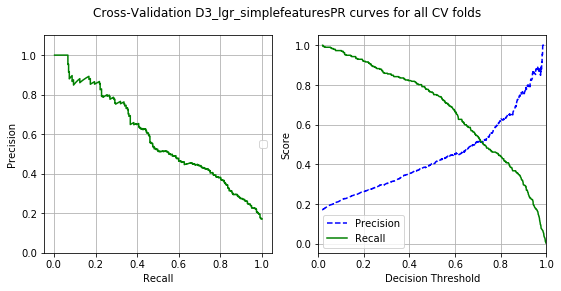

In [25]:
meval = ModelCVEvaluation(grid_search.best_estimator_, 'D3_lgr_simplefeatures', X_trainT, y_train, 8)

Addition of rolling means:

No handles with labels found to put in legend.


CV results
       average_precision  briers_score_loss
count           8.000000           8.000000
mean            0.633681           0.160155
std             0.085464           0.057095
min             0.541276           0.088818
25%             0.583762           0.117258
50%             0.604694           0.151445
75%             0.660559           0.203104
max             0.813023           0.241731


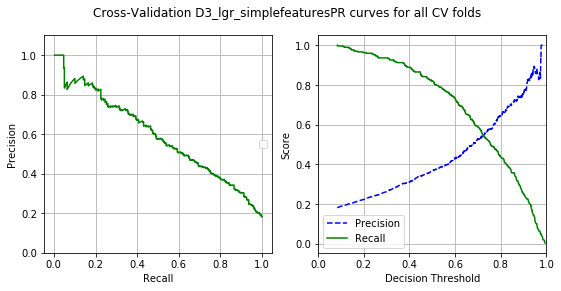

In [25]:
meval = ModelCVEvaluation(grid_search.best_estimator_, 'D3_lgr_simplefeatures', X_trainT, y_train, 8)

Model with morning ED features added.

No handles with labels found to put in legend.


CV results
       average_precision  briers_score_loss
count           8.000000           8.000000
mean            0.635954           0.139515
std             0.080021           0.050198
min             0.537968           0.073580
25%             0.594853           0.109603
50%             0.609564           0.129812
75%             0.663326           0.164796
max             0.794485           0.218897


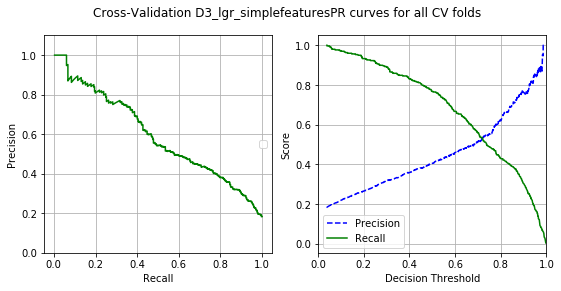

In [50]:
meval = ModelCVEvaluation(grid_search.best_estimator_, 'D3_lgr_simplefeatures', X_trainT, y_train, 8)

Baseline model with only prev day Occ and callender features:

No handles with labels found to put in legend.


CV results
       average_precision  briers_score_loss
count           8.000000           8.000000
mean            0.458439           0.177117
std             0.082774           0.036912
min             0.328018           0.107805
25%             0.424890           0.168024
50%             0.486408           0.182325
75%             0.507030           0.187368
max             0.544577           0.235288


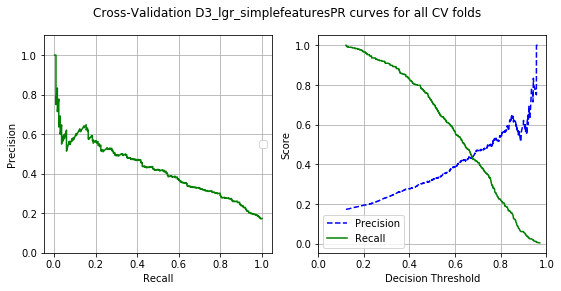

In [31]:
meval = ModelCVEvaluation(grid_search.best_estimator_, 'D3_lgr_simplefeatures', X_trainT, y_train, 8)

In [34]:
break

SyntaxError: 'break' outside loop (<ipython-input-34-6aaf1f276005>, line 4)

Look at each fold of Timseries:

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


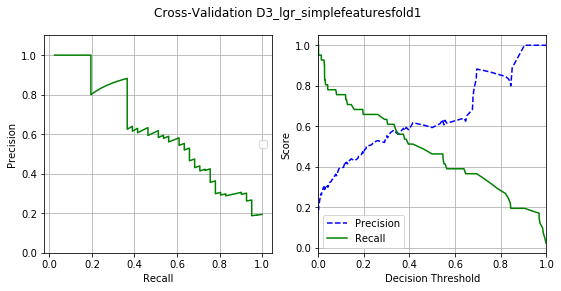

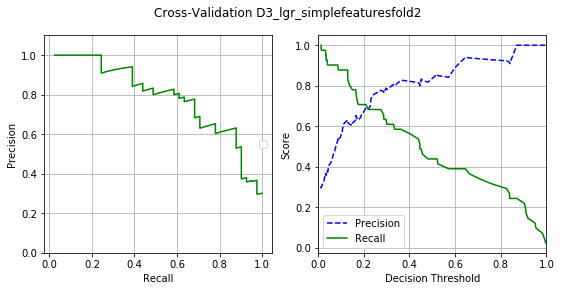

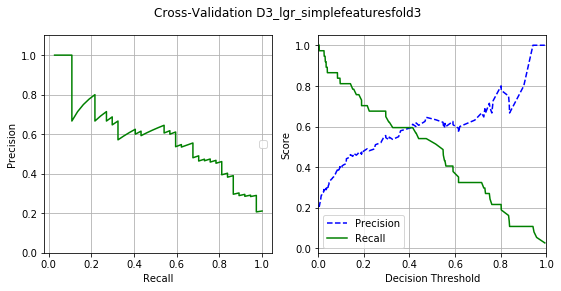

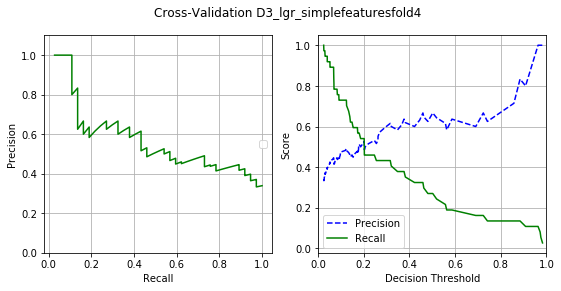

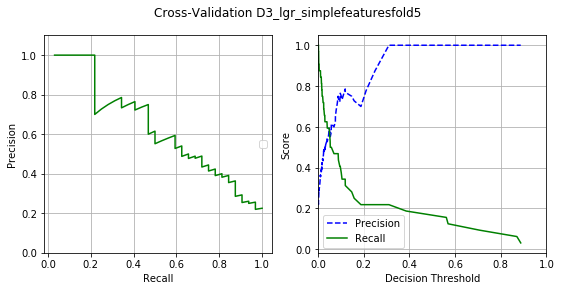

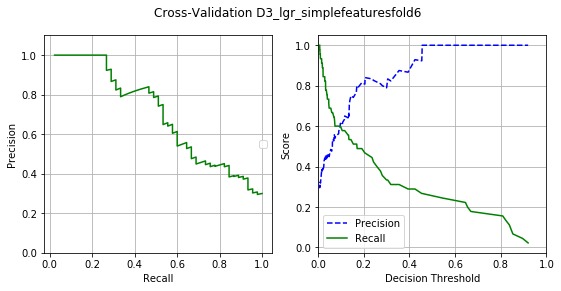

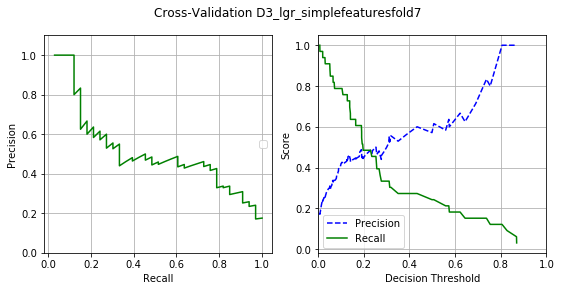

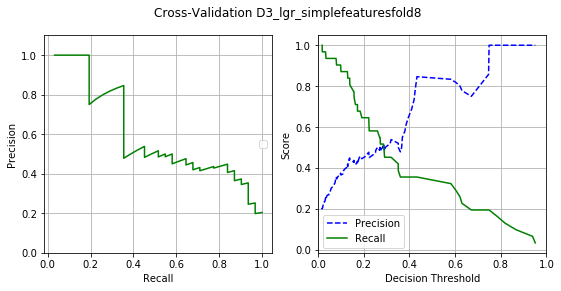

In [39]:
meval.plot_PR_curve_each_valid_set()

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


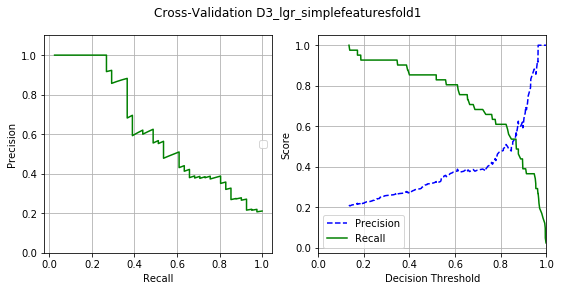

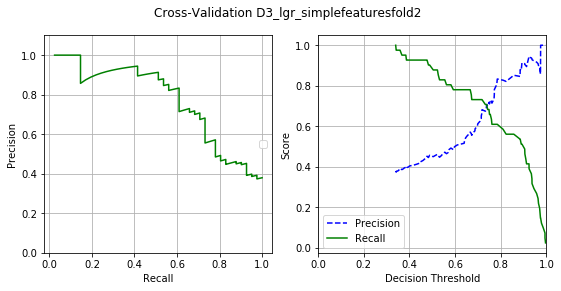

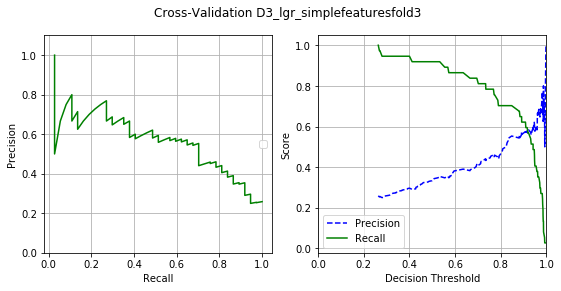

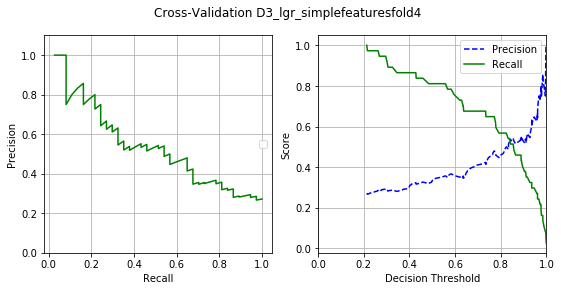

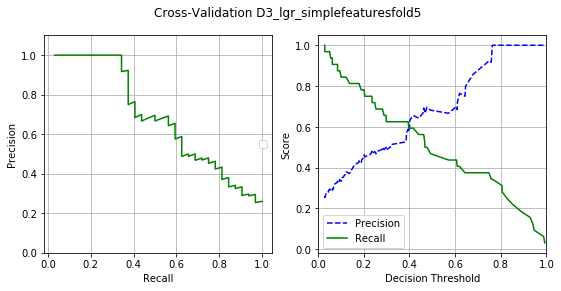

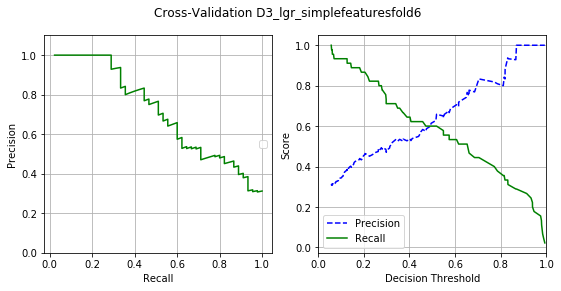

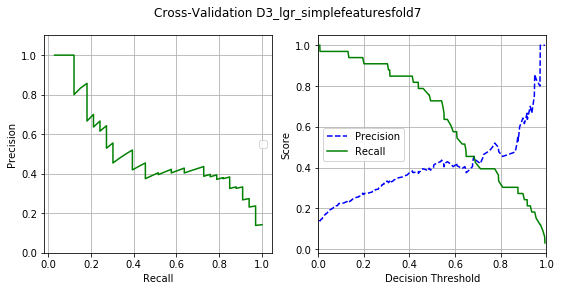

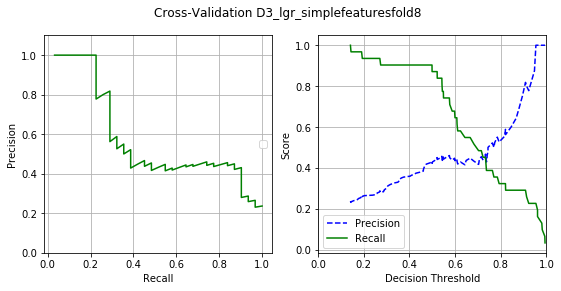

In [26]:
meval.plot_PR_curve_each_valid_set()

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


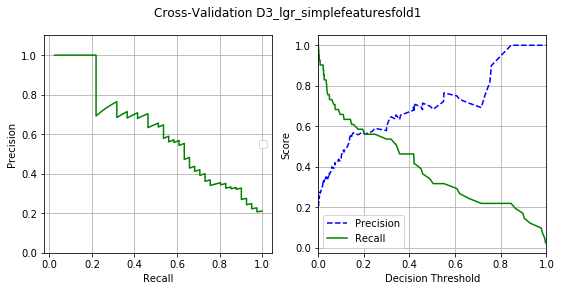

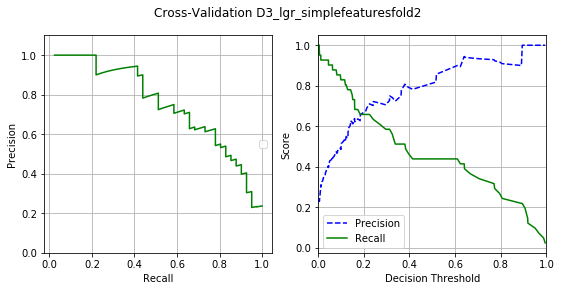

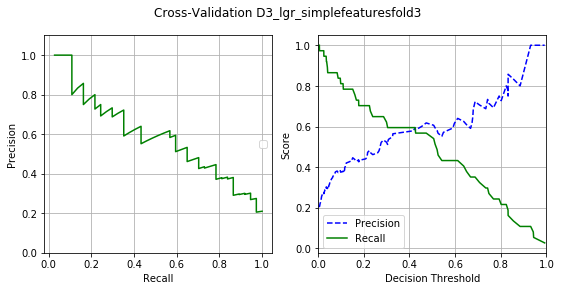

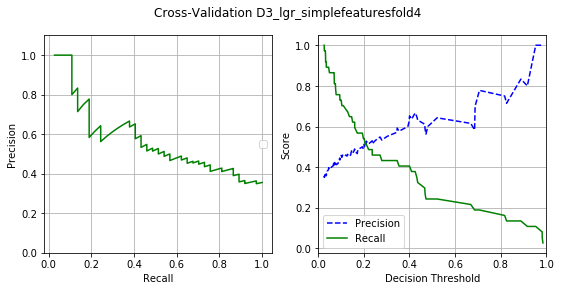

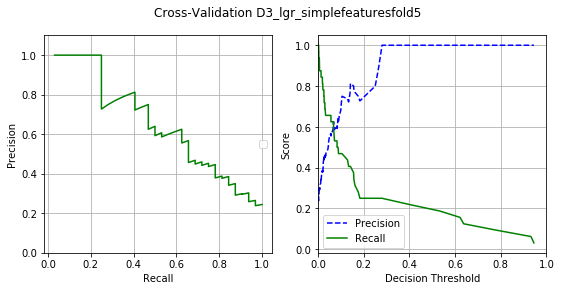

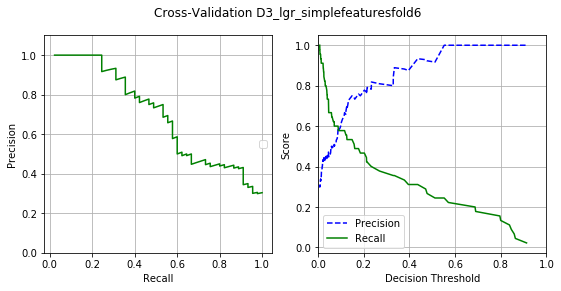

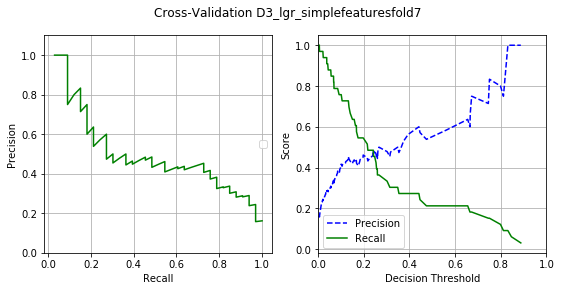

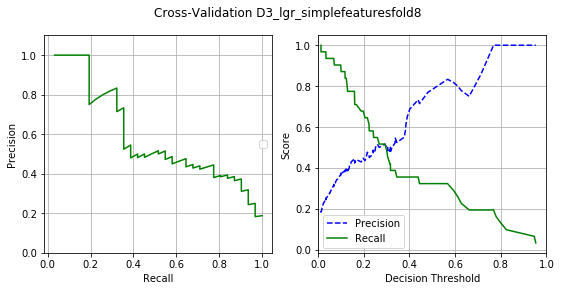

In [26]:
meval.plot_PR_curve_each_valid_set()